In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

In [2]:
sys.path.append(os.path.abspath('../scripts'))

In [ ]:
from time_series_modeling import (load_data, exploratory_data_analysis, fit_arimax_model, fit_var_model, forecast_var_model,apply_lstm_model)

In [4]:

# Load data
data = load_data('../data/BrentOilPrices.csv', '../data/syntetic data/GDP.csv', '../data/syntetic data/Inflation.csv', '../data/syntetic data/ExchangeRate.csv')

c:\Users\ftesfaye\Desktop\KIFIYA\KIFIYA_PROJECT_WEEK_10\TimeSeries-Change_Point_Detection\scripts\time_series_modeling.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(price_path, parse_dates=['Date'], index_col='Date')


In [5]:
data.head(5)


,Price,GDP,Inflation,ExchangeRate
Date,,,,
2000-05-31,29.64,50819.052232,9.744666,1.561751
2000-06-30,31.58,52497.338093,9.426900,1.384882
2000-07-31,25.30,49766.040162,5.365212,1.456157
2000-08-31,35.08,49365.090245,7.119896,1.406853
2000-10-31,30.15,49128.346780,6.032180,1.656892


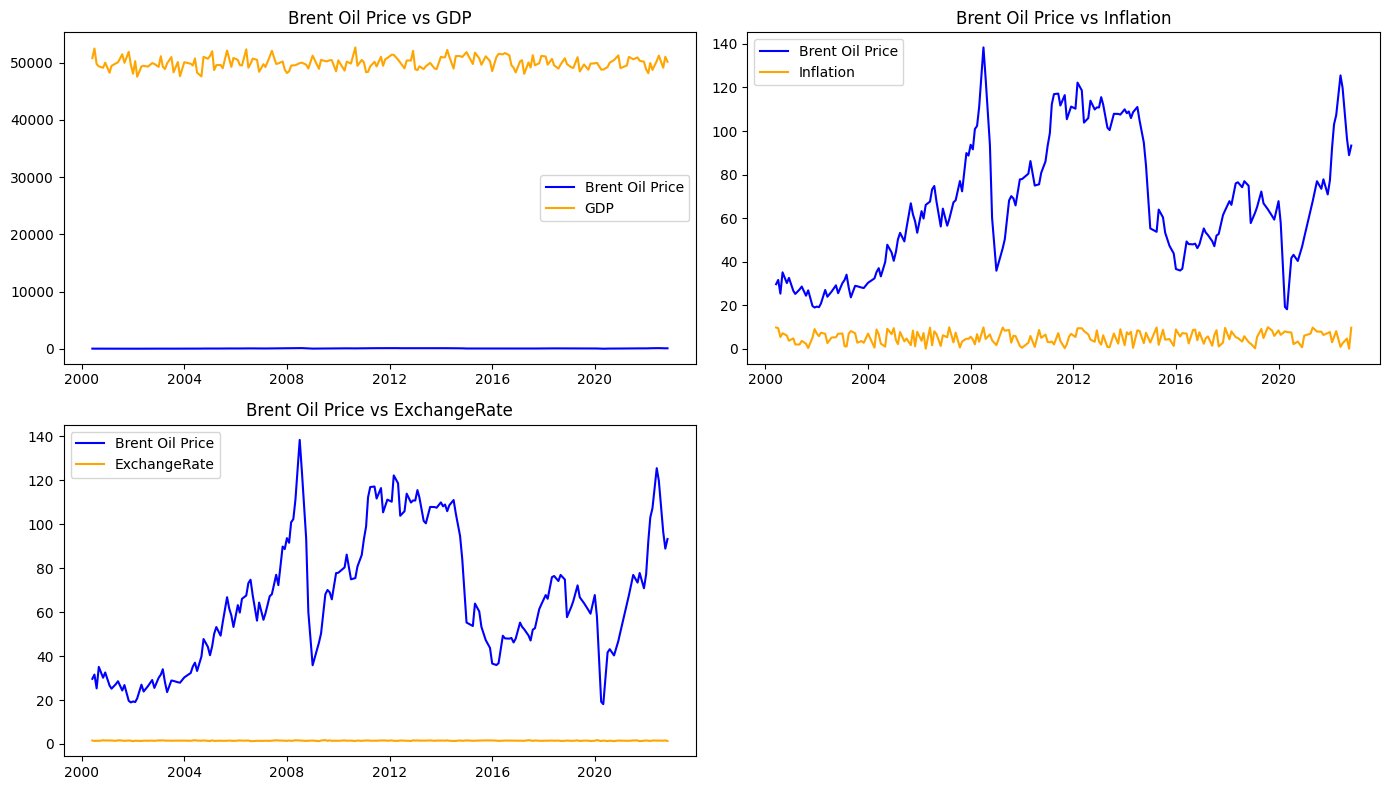

Correlation matrix:
                 Price       GDP  Inflation  ExchangeRate
Price         1.000000  0.072026  -0.046950      0.067722
GDP           0.072026  1.000000   0.126646      0.058838
Inflation    -0.046950  0.126646   1.000000     -0.167194
ExchangeRate  0.067722  0.058838  -0.167194      1.000000


In [6]:
# Perform EDA
exploratory_data_analysis(data)


In [7]:
# Fit ARIMAX Model and display results
print("\nARIMAX Model Results:")
arimax_model = fit_arimax_model(data)


ARIMAX Model Results:
                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  189
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -665.196
Date:                Mon, 04 Nov 2024   AIC                           1342.392
Time:                        21:02:49   BIC                           1361.811
Sample:                             0   HQIC                          1350.260
                                - 189                                         
Covariance Type:                  opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
GDP              0.0005      0.000      0.991      0.321      -0.000       0.001
Inflation        0.0501      0.160      0.313      0.755      -0.264       0.364
ExchangeRate    -2.08

c:\Users\ftesfaye\Desktop\KIFIYA\KIFIYA_PROJECT_WEEK_10\TimeSeries-Change_Point_Detection\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ftesfaye\Desktop\KIFIYA\KIFIYA_PROJECT_WEEK_10\TimeSeries-Change_Point_Detection\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ftesfaye\Desktop\KIFIYA\KIFIYA_PROJECT_WEEK_10\TimeSeries-Change_Point_Detection\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [8]:
# Fit VAR Model and display results
print("\nVAR Model Results:")
var_model = fit_var_model(data)



VAR Model Results:
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 04, Nov, 2024
Time:                     21:02:52
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    15.9412
Nobs:                     188.000    HQIC:                   15.7364
Log likelihood:          -2513.15    FPE:                5.93859e+06
AIC:                      15.5969    Det(Omega_mle):     5.34669e+06
--------------------------------------------------------------------
Results for equation Price
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                  49.958719        30.756059            1.624           0.104
L1.Price                0.958356         0.020939           45.768           0.000
L1.GDP                 -0.001108

c:\Users\ftesfaye\Desktop\KIFIYA\KIFIYA_PROJECT_WEEK_10\TimeSeries-Change_Point_Detection\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [9]:
# Apply and evaluate LSTM
lstm_model = apply_lstm_model(data)
# Predictions, interpretation, and visualization.

Epoch 1/10


c:\Users\ftesfaye\Desktop\KIFIYA\KIFIYA_PROJECT_WEEK_10\TimeSeries-Change_Point_Detection\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.1927
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0551
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0396
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0421
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0399
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0411
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0430
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0337
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0326
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0312


In [11]:
# Forecast using the VAR model
print("\nVAR Model Forecast:")
forecast = forecast_var_model(var_model, data, steps=5)
forecast


VAR Model Forecast:


array([[9.16159317e+01, 5.04144373e+04, 5.07376322e+00, 1.51863030e+00],
       [9.05228149e+01, 5.00788507e+04, 5.07737034e+00, 1.50576413e+00],
       [8.97760151e+01, 5.00569202e+04, 5.04967294e+00, 1.50570783e+00],
       [8.90831019e+01, 5.00517047e+04, 5.05169933e+00, 1.50548602e+00],
       [8.84236834e+01, 5.00493685e+04, 5.05450058e+00, 1.50532682e+00]])